In [2]:
import pickle as pkl
import numpy as np

result_dir = '/mnt/work/Stanford40/results/'

train_data = pkl.load(open(result_dir+'train_data.pkl', 'r'))
label = pkl.load(open(result_dir+'label.pkl', 'r'))

label2num = label['label2num']
num2label = label['num2label']
L = len(label2num.keys())
N = len(train_data['names'])


In [12]:
def get_sim(x, y):
    return np.inner(x,y) / (np.linalg.norm(x) * np.linalg.norm(y))


def similarity_matrix(data, labels):
    # calculate the similarity matrix of each classes
    M = np.zeros((L, L))
    C = np.zeros((L, L))

    for i in range(N):
        for j in range(N):
            M[label2num[labels[i]], label2num[labels[j]]] += get_sim(data[i], data[j])
            C[label2num[labels[i]], label2num[labels[j]]] += 1
    
#    print C
    
    for i in range(L):
        for j in range(L):
            if C[i, j] > 0:
                M[i, j] /= C[i, j]
    return M

import matplotlib.pyplot as plt
import itertools

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float')
        for i in range(cm.shape[0]):
            if cm[i].sum() > 0:
                cm[i] /= cm[i].sum()
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    #print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=90)
    plt.yticks(tick_marks, classes)

#    fmt = '.2f' if normalize else 'd'
    fmt = '.2f'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

[[0.62581185 0.54995531 0.59088544 ... 0.59773553 0.60585315 0.57272034]
 [0.54995531 0.70291231 0.59594068 ... 0.55406494 0.56204709 0.52667648]
 [0.59088544 0.59594068 0.69453058 ... 0.59091649 0.61822944 0.59333733]
 ...
 [0.59773553 0.55406494 0.59091649 ... 0.6062637  0.60897108 0.56773537]
 [0.60585315 0.56204709 0.61822944 ... 0.60897108 0.69338435 0.61633439]
 [0.57272034 0.52667648 0.59333733 ... 0.56773537 0.61633439 0.70128461]]
Confusion matrix, without normalization


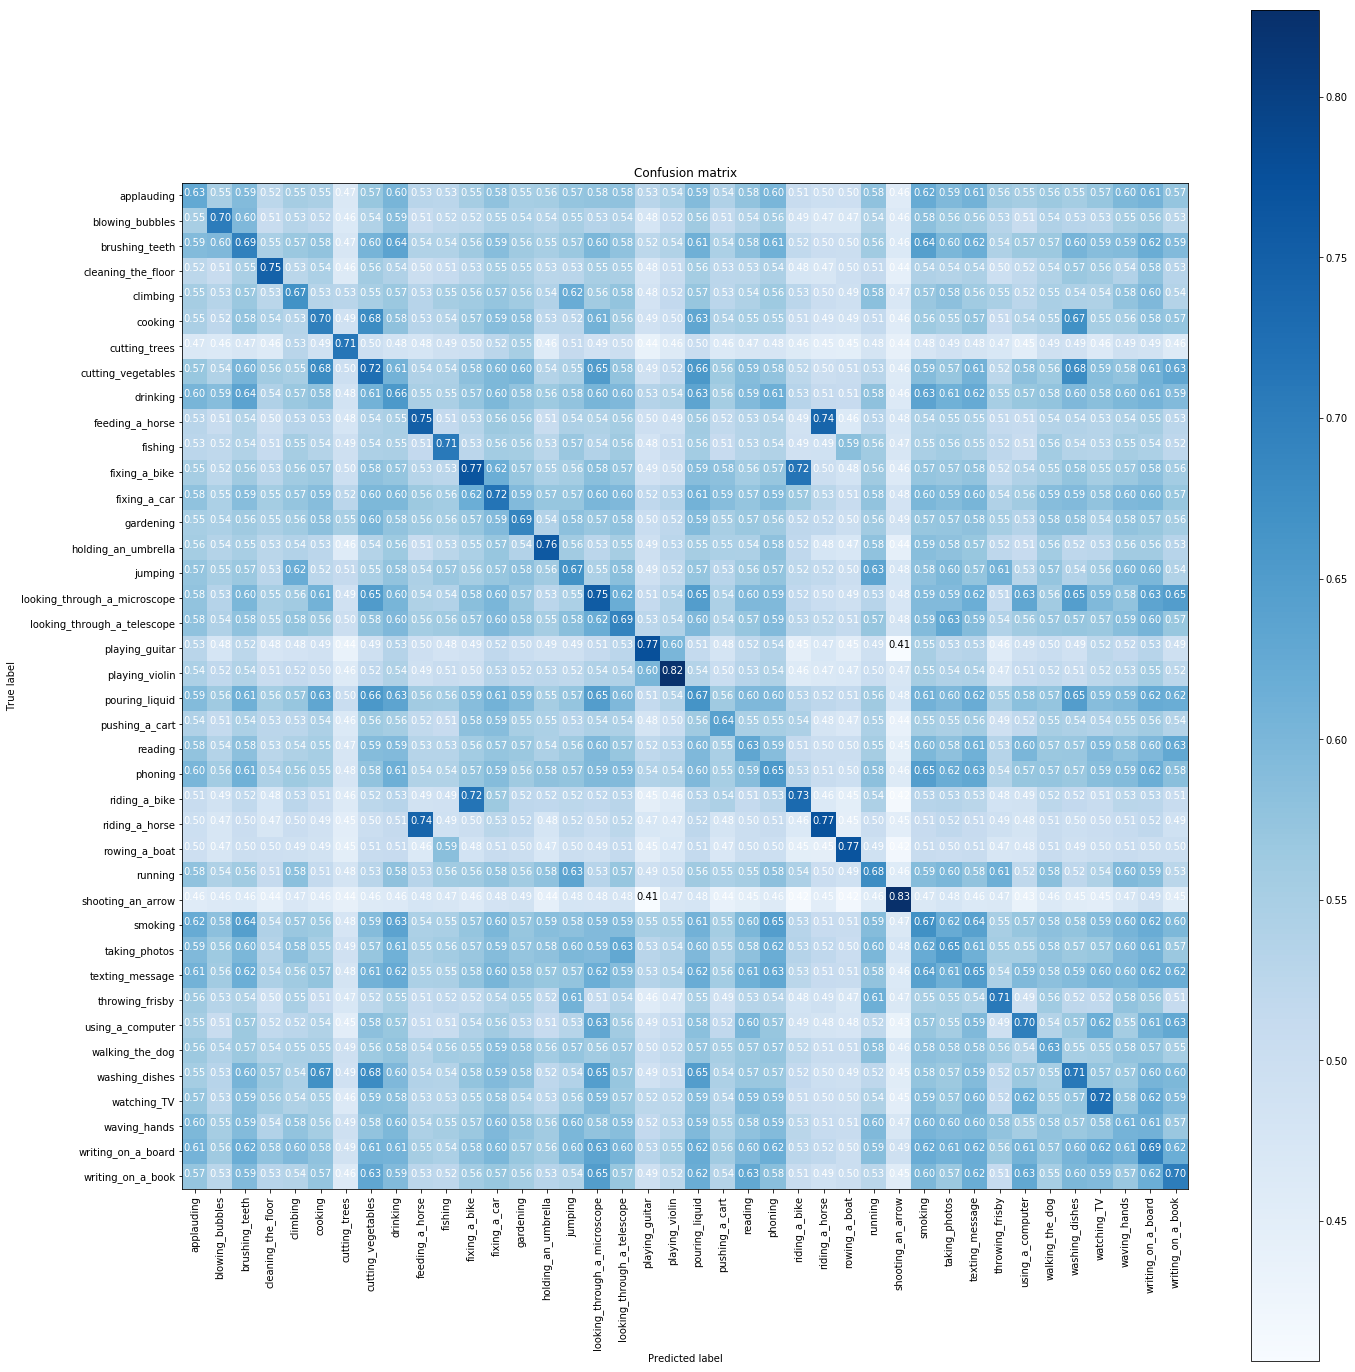

In [15]:
M_feats = similarity_matrix(train_data['feats'], train_data['label'])
print M_feats

class_names = [num2label[i] for i in range(L)]
plt.figure(figsize=(20, 20))
plot_confusion_matrix(M_feats, classes=class_names, normalize=False)
plt.show()

[[0.06668516 0.01164851 0.02417229 ... 0.03542609 0.03231647 0.01611437]
 [0.01164851 0.4645246  0.05716239 ... 0.01066134 0.0090661  0.00381633]
 [0.02417229 0.05716239 0.14515308 ... 0.01816011 0.01587903 0.01051804]
 ...
 [0.03542609 0.01066134 0.01816011 ... 0.03839143 0.0259667  0.01173499]
 [0.03231647 0.0090661  0.01587903 ... 0.0259667  0.07968679 0.02943329]
 [0.01611437 0.00381633 0.01051804 ... 0.01173499 0.02943329 0.16024721]]
Confusion matrix, without normalization


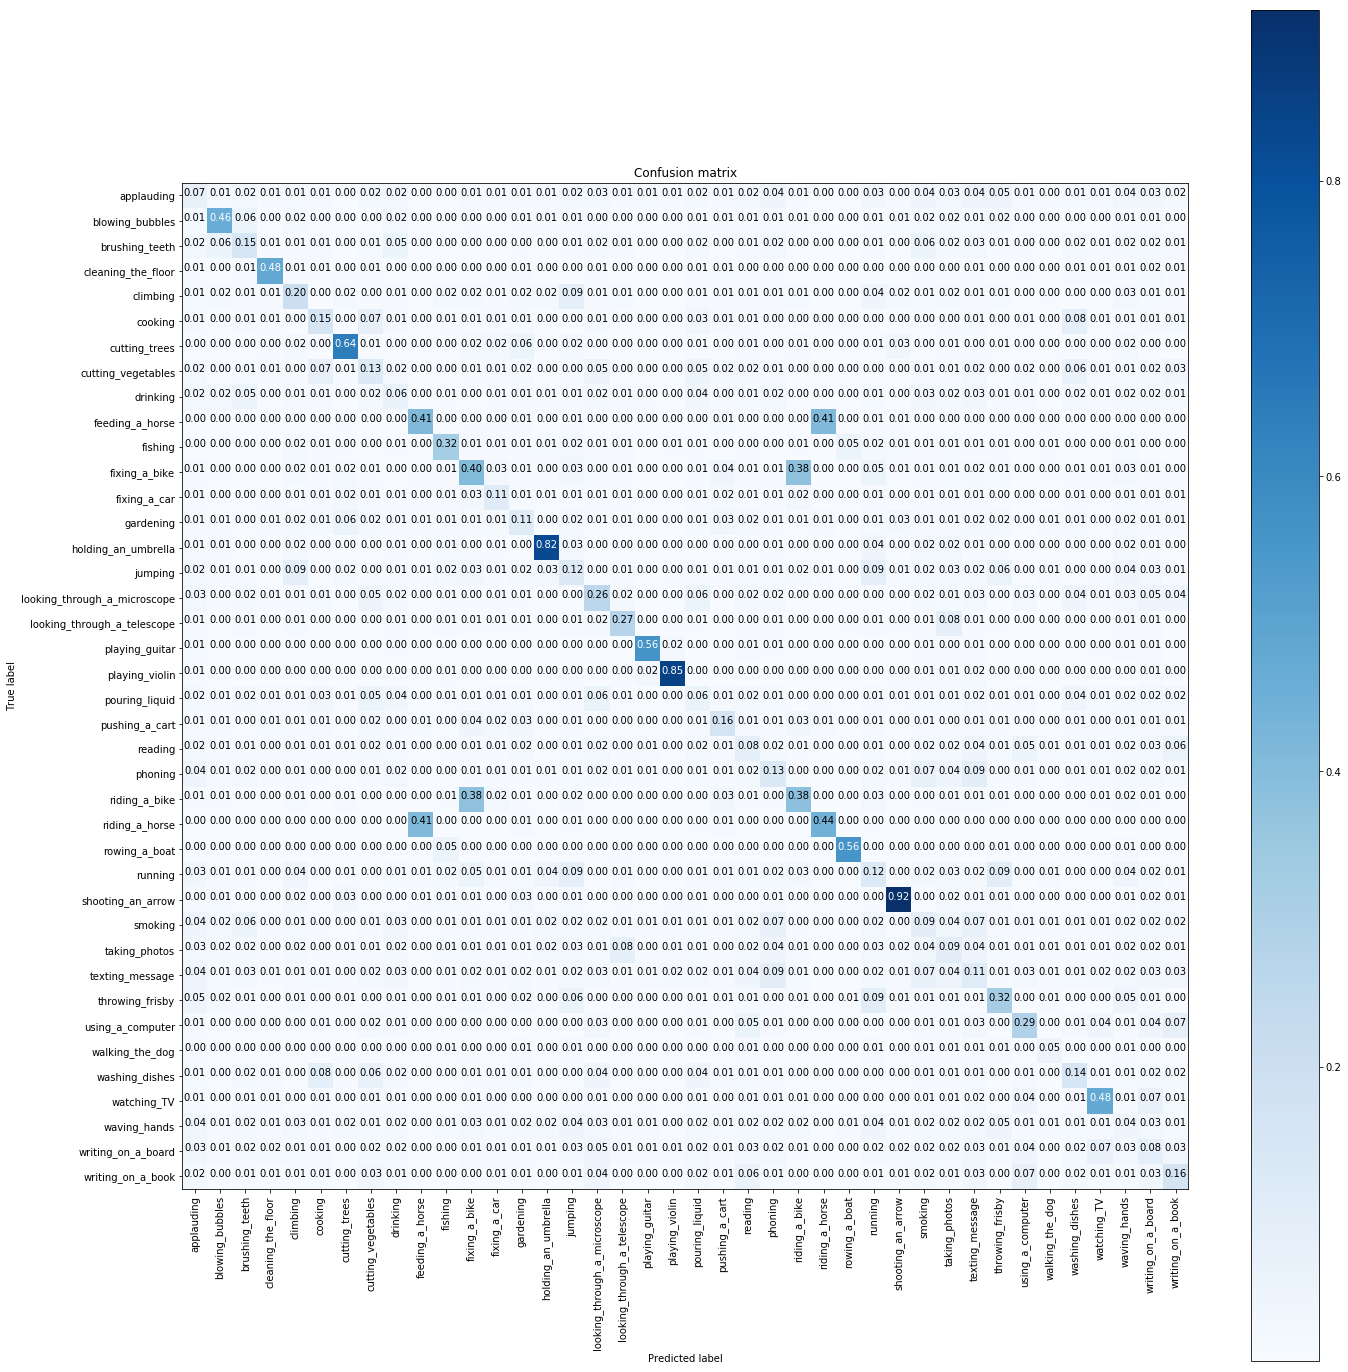

In [16]:
M_probs = similarity_matrix(train_data['probs'], train_data['label'])
print M_probs

class_names = [num2label[i] for i in range(L)]
plt.figure(figsize=(20, 20))
plot_confusion_matrix(M_probs, classes=class_names, normalize=False)
plt.show()

[[0.99972681 0.11046432 0.1231932  ... 0.39429011 0.16940421 0.09851474]
 [0.11046432 0.99962819 0.24256042 ... 0.23260489 0.13384504 0.13695345]
 [0.1231932  0.24256042 0.99960876 ... 0.30932081 0.15244433 0.1126184 ]
 ...
 [0.39429011 0.23260489 0.30932081 ... 0.99949042 0.19050814 0.13522146]
 [0.16940421 0.13384504 0.15244433 ... 0.19050814 0.9986978  0.70824936]
 [0.09851474 0.13695345 0.1126184  ... 0.13522146 0.70824936 0.99895118]]
Confusion matrix, without normalization


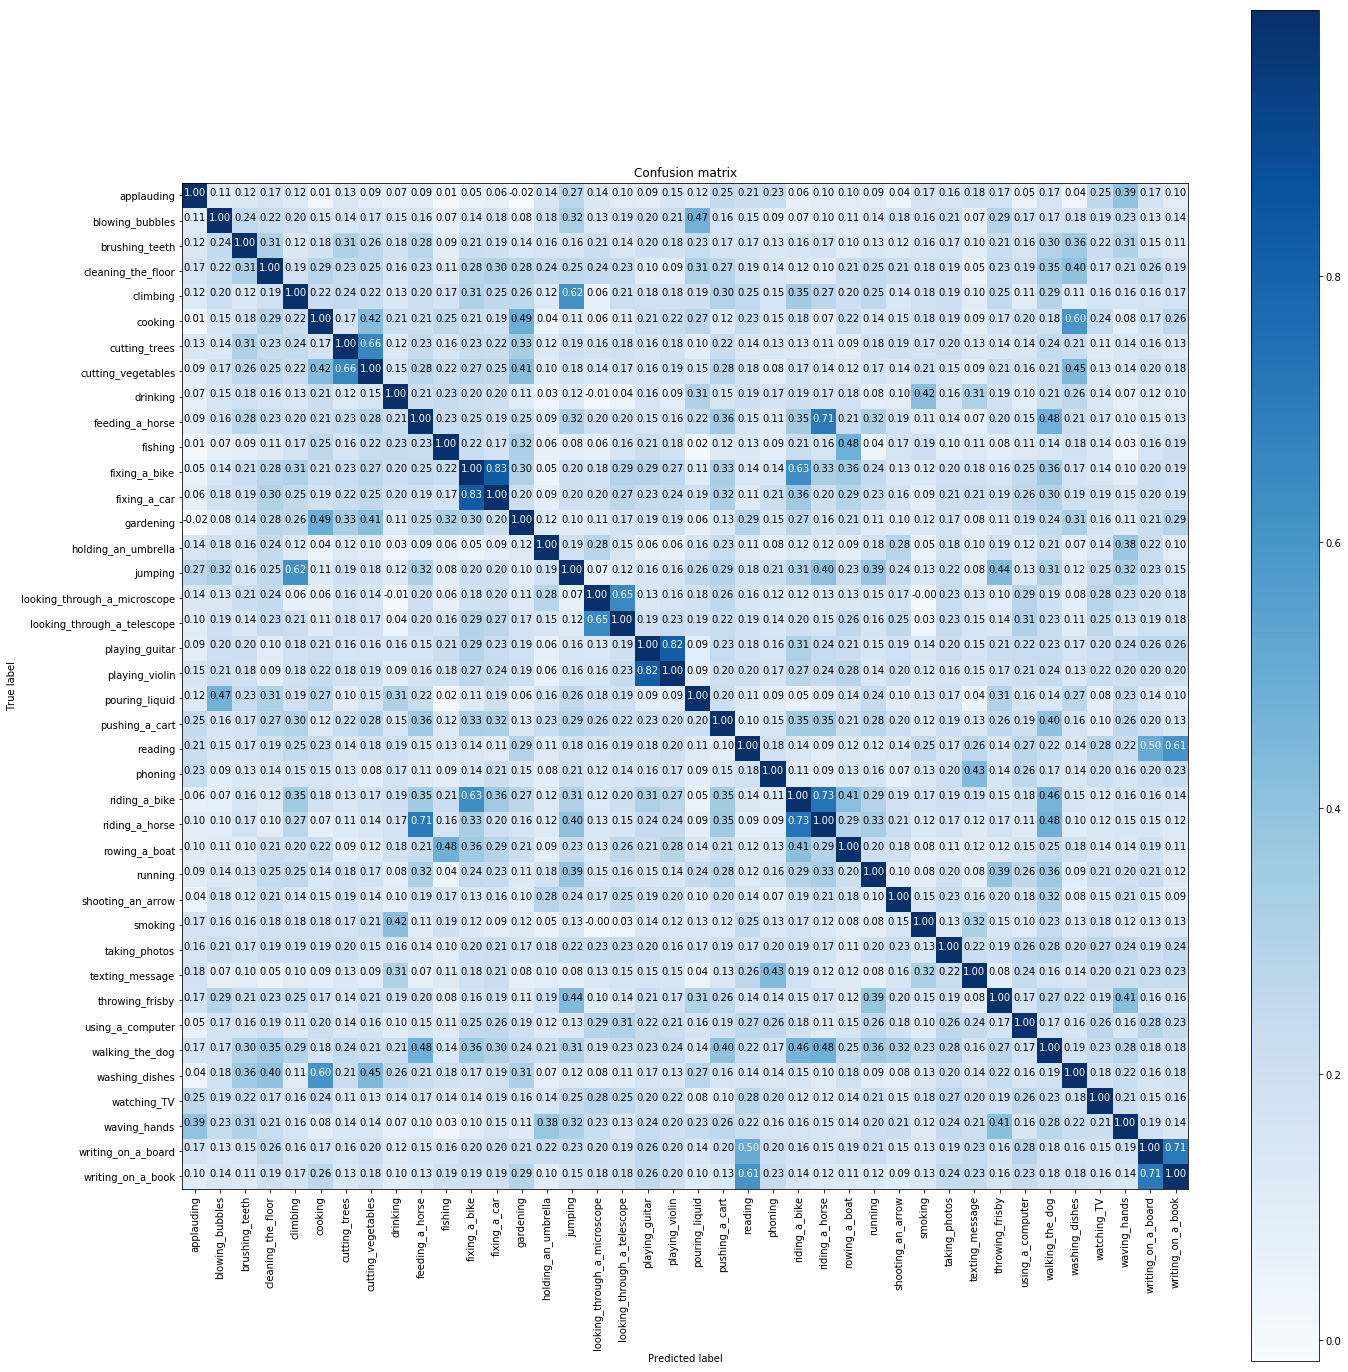

In [17]:
M_text = similarity_matrix(train_data['text'], train_data['label'])
print M_text

class_names = [num2label[i] for i in range(L)]
plt.figure(figsize=(20, 20))
plot_confusion_matrix(M_text, classes=class_names, normalize=False)
plt.show()